In [52]:
import pandas as pd
from functools import reduce

In [53]:
BED_FILE = 'forGio.bed'

In [54]:
column_names = names=["id","start","end","base_index","coverage"]
bedfile = pd.read_csv(BED_FILE, sep='\t', names=column_names)

In [55]:
bedfile.head()

id  start    end  base_index  coverage
0  tig00000002      1  41733           1         0
1  tig00000002      1  41733           2         0
2  tig00000002      1  41733           3         0
3  tig00000002      1  41733           4         0
4  tig00000002      1  41733           5         1

In [56]:
def values_below_means(series):
    return len([x for x in series if x < series.mean()])
def values_below_ten(series):
    return len([x for x in series if x < 10])
def values_all(series):
    return [x for x in series]

In [57]:
group_by_id = bedfile.groupby(by="id")
aggregated = group_by_id.agg({"coverage" : ["sum", "mean", values_below_means, values_below_ten, values_all]})

In [58]:
aggregated

coverage                                             \
                 sum   mean values_below_means values_below_ten   
id                                                                
tig00000002     7242  3.621               1015             2000   

                                                                
                                                    values_all  
id                                                              
tig00000002  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...

In [72]:
##for group_name in group_by_id.groups:
##    group_by_id.get_group(group_name).plot.bar(x="base_index", y="coverage")

In [99]:
def draw_graph_for(contig, group):
    group.get_group(contig).plot(kind="area",x="base_index", y="coverage", figsize=(20, 10))

In [100]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [101]:
%matplotlib inline

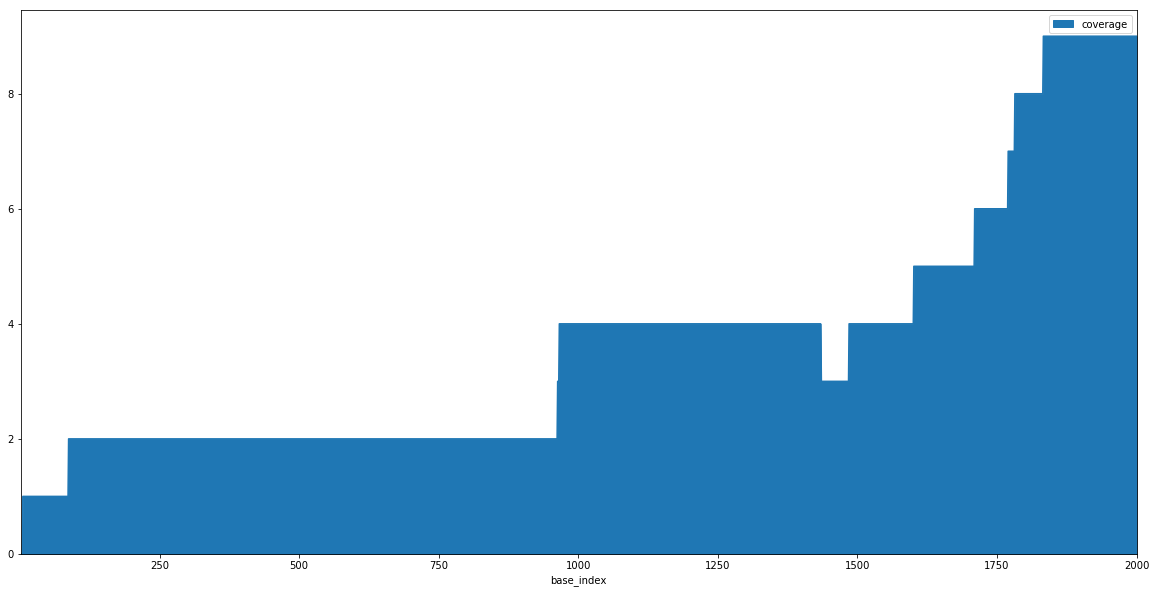

In [102]:
interact(draw_graph_for, contig=[group_name for group_name in group_by_id.groups], group=fixed(group_by_id));

In [ ]:
bedfile.add